In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat
import statsmodels.api as sm
import scikit_posthocs as sp

pd.set_option('display.max_columns', 9999)

%matplotlib inline

In [4]:
pts = pd.read_csv('pts_dummies.csv')
pts.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
pts.head()

,patientunitstayid,gender,age,BMI,actualventdays,ICU_duration,gcs_score,apachescore,from_OR,heartrate,teachingstatus,opioid,nsaid,painmeds,mme_per_day,Antibiotic cycling,Cerebral vasospasm prevention/therapy,Congestive Heart Failure (CHF),Electrolyte replacement,End of life,Glucose control,Hypothermia,Lung protective ventilation,Myocardial infarction,Other,Pressure ulcer prophylaxis,Sedation,Sepsis bundle,Spinal precautions,Steroid taper,Tissue Plasminogen Activator (tPA),Ventilator bundle,Ventilator wean,numbedscategory_100 - 249,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
0,154752,1,53.0,33.898903,0.0,1.130556,3.0,86.0,0,70.0,1,1,1,1,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,156771,0,88.0,27.813945,0.0,0.512500,14.0,42.0,0,60.0,0,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,173247,0,81.0,37.592716,0.0,3.273611,15.0,42.0,0,72.0,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,211851,0,48.0,23.612229,0.0,2.702778,15.0,25.0,0,68.0,0,1,1,1,79.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,222701,1,51.0,44.089998,3.0,1.840278,15.0,25.0,0,98.0,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from matplotlib.legend_handler import HandlerLine2D

### Predicting Opioid Administration

In [90]:
X = pts.drop(columns=['opioid','painmeds','mme_per_day', 'patientunitstayid'])
y = pts.opioid

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Hyperparameter Tuning

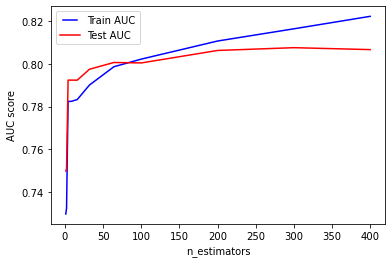

In [77]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 400]
train_results = []
test_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

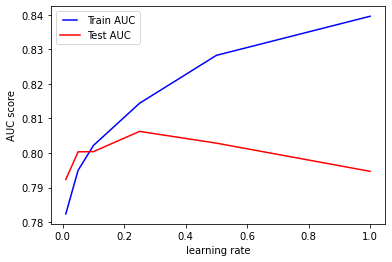

In [78]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

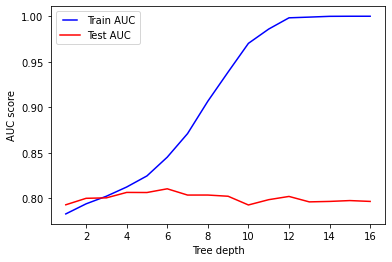

In [79]:
max_depths = np.linspace(1, 16, 16, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [80]:
# trying gridsearch

from sklearn.model_selection import GridSearchCV

param_grids = {
    "n_estimators":[32, 64, 100, 200, 300, 400],
    "learning_rate": [1, 0.5, 0.25, 0.1, 0.05],
    "max_depth": np.linspace(1, 12, 12)
    }

clf = GridSearchCV(GradientBoostingClassifier(), param_grids, scoring='roc_auc', n_jobs=-1, cv=3)

clf.fit(X_train, y_train)

clf.best_params_, clf.best_score_

({'learning_rate': 0.05, 'max_depth': 5.0, 'n_estimators': 200},
 0.8752271817172054)

In [81]:
param1 = {"subsample":[0.5, 0.7, 0.9, 1.0]}

grid1 = GridSearchCV(GradientBoostingClassifier(learning_rate=0.05, max_depth=5.0, n_estimators=200), param1, scoring='roc_auc', n_jobs=-1, cv=3)

grid1.fit(X_train, y_train)

grid1.best_params_, grid1.best_score_

({'subsample': 1.0}, 0.8752342689776658)

In [82]:
param2 = {"min_samples_split": np.linspace(0.1, 0.5, 5), "min_samples_leaf": np.linspace(0.1, 0.5, 5), "max_features":["log2","sqrt", None]}

grid2 = GridSearchCV(GradientBoostingClassifier(learning_rate=0.05, max_depth=5.0, n_estimators=200, subsample=1.0), param2, scoring='roc_auc', n_jobs=-1, cv=3)

grid2.fit(X_train, y_train)

grid2.best_params_, grid2.best_score_

({'max_features': None, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1},
 0.8621052962996575)

Using the following parameters:
- `n_estimators= 200`
- `learning_rate = 0.05`
- `max_depth = 5`

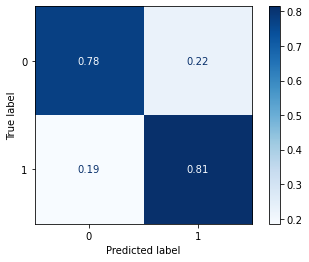

In [83]:
y_pred = grid2.predict(X_test)
metrics.plot_confusion_matrix(grid2, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1130
           1       0.78      0.81      0.79      1080

    accuracy                           0.79      2210
   macro avg       0.80      0.80      0.79      2210
weighted avg       0.80      0.79      0.79      2210



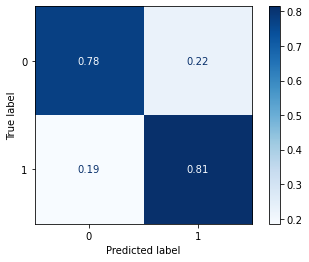

In [91]:
gb_clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=1.0, max_features=None, min_samples_leaf=0.1, min_samples_split=0.1, random_state=0)
gb_clf2.fit(X_train, y_train)

y_pred = gb_clf2.predict(X_test)

metrics.plot_confusion_matrix(gb_clf2, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1130
           1       0.78      0.81      0.79      1080

    accuracy                           0.79      2210
   macro avg       0.80      0.80      0.79      2210
weighted avg       0.80      0.79      0.79      2210



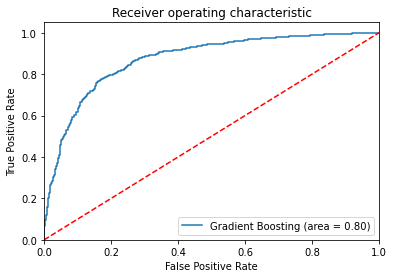

In [93]:
logit_roc_auc = roc_auc_score(y_test, gb_clf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_clf2.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [94]:
import shap

shap_values = shap.TreeExplainer(gb_clf2).shap_values(X_train)

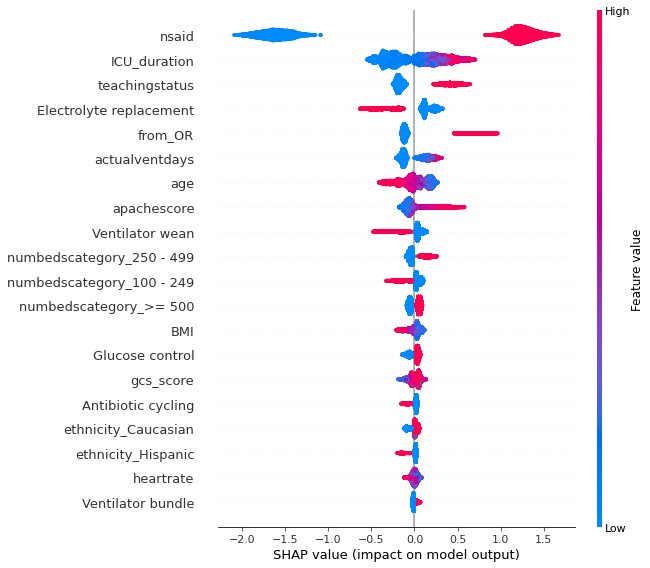

In [95]:
shap.summary_plot(shap_values, X_train)

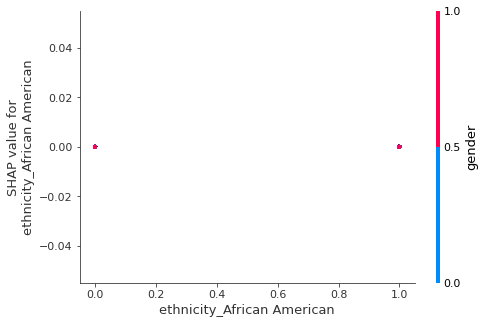

In [96]:
shap.dependence_plot("ethnicity_African American", shap_values, X_train)

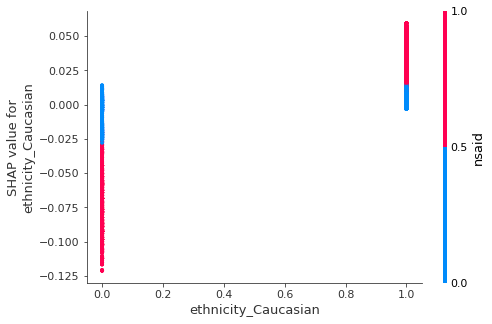

In [97]:
shap.dependence_plot("ethnicity_Caucasian", shap_values, X_train)

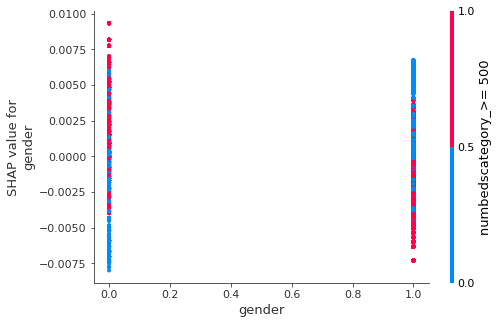

In [98]:
shap.dependence_plot("gender", shap_values, X_train)

In [99]:
pts.head()

,patientunitstayid,gender,age,BMI,actualventdays,ICU_duration,gcs_score,apachescore,from_OR,heartrate,teachingstatus,opioid,nsaid,painmeds,mme_per_day,Antibiotic cycling,Cerebral vasospasm prevention/therapy,Congestive Heart Failure (CHF),Electrolyte replacement,End of life,Glucose control,Hypothermia,Lung protective ventilation,Myocardial infarction,Other,Pressure ulcer prophylaxis,Sedation,Sepsis bundle,Spinal precautions,Steroid taper,Tissue Plasminogen Activator (tPA),Ventilator bundle,Ventilator wean,numbedscategory_100 - 249,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
0,154752,1,53.0,33.898903,0.0,1.130556,3.0,86.0,0,70.0,1,1,1,1,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,156771,0,88.0,27.813945,0.0,0.512500,14.0,42.0,0,60.0,0,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,173247,0,81.0,37.592716,0.0,3.273611,15.0,42.0,0,72.0,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,211851,0,48.0,23.612229,0.0,2.702778,15.0,25.0,0,68.0,0,1,1,1,79.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,222701,1,51.0,44.089998,3.0,1.840278,15.0,25.0,0,98.0,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [100]:
stat.ttest_ind(pts.opioid[pts.gender==0], pts.opioid[pts.gender==1])

Ttest_indResult(statistic=-2.666289738580028, pvalue=0.007674938442227099)

___
### Predicting MME Scores

In [49]:
pts.head()

,patientunitstayid,gender,age,BMI,actualventdays,ICU_duration,gcs_score,apachescore,from_OR,heartrate,teachingstatus,opioid,nsaid,painmeds,mme_per_day,Antibiotic cycling,Cerebral vasospasm prevention/therapy,Congestive Heart Failure (CHF),Electrolyte replacement,End of life,Glucose control,Hypothermia,Lung protective ventilation,Myocardial infarction,Other,Pressure ulcer prophylaxis,Sedation,Sepsis bundle,Spinal precautions,Steroid taper,Tissue Plasminogen Activator (tPA),Ventilator bundle,Ventilator wean,numbedscategory_100 - 249,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
0,154752,1,53.0,33.898903,0.0,1.130556,3.0,86.0,0,70.0,1,1,1,1,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,156771,0,88.0,27.813945,0.0,0.512500,14.0,42.0,0,60.0,0,1,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,173247,0,81.0,37.592716,0.0,3.273611,15.0,42.0,0,72.0,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,211851,0,48.0,23.612229,0.0,2.702778,15.0,25.0,0,68.0,0,1,1,1,79.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,222701,1,51.0,44.089998,3.0,1.840278,15.0,25.0,0,98.0,1,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [62]:
X = pts.drop(columns=['painmeds','mme_per_day'])
y = pts.mme_per_day

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Gradient Boosting

from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.25, max_depth=5, random_state=0)
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('rmse:', rmse, '| r2 score:', r2)

rmse: 185.33101026350232 | r2 score: -0.008716410619119763


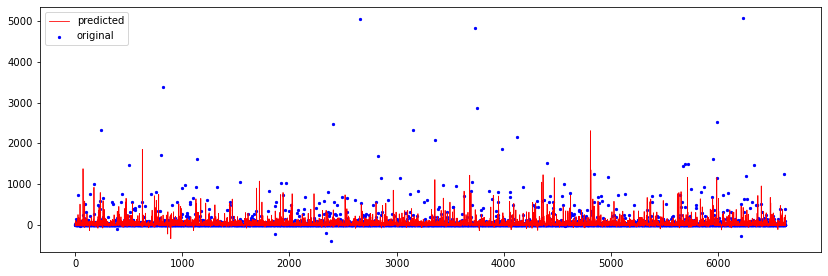

In [52]:
plt.figure(figsize=(14, 4.5))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

___
### Meeting - April 23

TLDR; The regression model for predicting mme scores are shit.

Next Steps:
- Try SVM, RF, CNN
- ANOVA or T-test between ethnicites and MME to find significance
- SHAP Scores of feature importances for binary opioid classification model
- Model patient where ethnicity affects opioid administration

In [53]:
# SVM

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

r2 = regr.score(X_test, y_test)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('rmse:', rmse, '| r2 score:', r2)

rmse: 184.59402329050832 | r2 score: -0.0007098419411399881


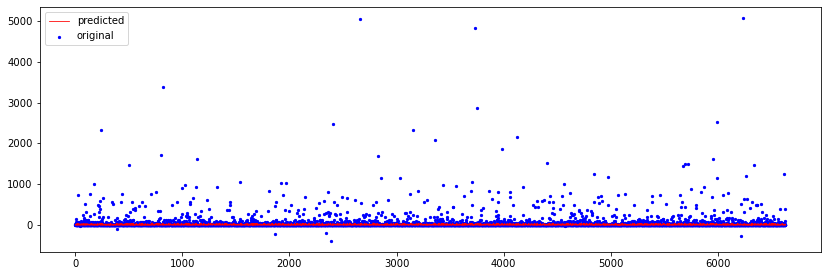

In [54]:
plt.figure(figsize=(14, 4.5))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [55]:
# RF

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
rf.fit(X_train, y_train)

r2 = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('rmse:', rmse, '| r2 score:', r2)

rmse: 172.83090493292462 | r2 score: 0.12276549089255462


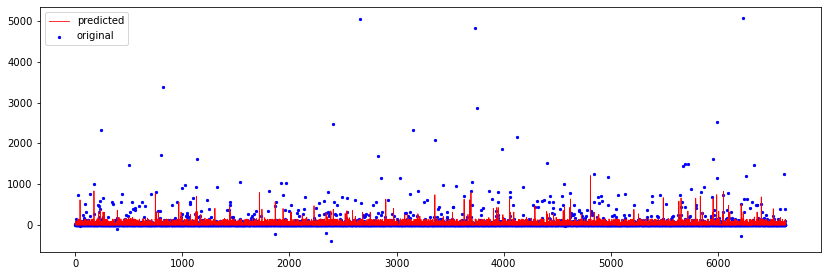

In [56]:
plt.figure(figsize=(14, 4.5))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [68]:
# CNN

X = pts.drop(columns=['painmeds','mme_per_day'])
y = pts.mme_per_day

X = X.values.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(41,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()

model.fit(X_train, y_train, batch_size=12, epochs=200, verbose=0)

y_pred = model.predict(X_test)
print(model.evaluate(X_train, y_train))

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('rmse:', rmse)

(22098, 41, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 32)            96        
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                81984     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 82,145
Trainable params: 82,145
Non-trainable params: 0
_________________________________________________________________
484/484 [==============================] - 0s 500us/step - loss: 23406.0039
23406.00390625
rmse: 186.5151388051677


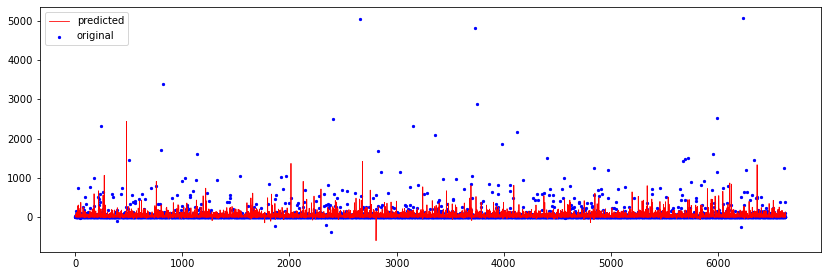

In [69]:
plt.figure(figsize=(14, 4.5))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### Pain Score Prediction

In [6]:
pts = pd.read_csv('pts_dummies.csv')
pts.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
pts.head()

,patientunitstayid,gender,age,BMI,actualventdays,ICU_duration,gcs_score,apachescore,from_OR,heartrate,teachingstatus,opioid,nsaid,painmeds,initialPain,finalPain,mme_per_day,numbedscategory_100 - 249,numbedscategory_250 - 499,numbedscategory_<100,numbedscategory_>= 500,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,Antibiotic cycling,Cerebral vasospasm prevention/therapy,Congestive Heart Failure (CHF),Electrolyte replacement,End of life,Glucose control,Hypothermia,Lung protective ventilation,Myocardial infarction,Other,Pressure ulcer prophylaxis,Sedation,Sepsis bundle,Spinal precautions,Steroid taper,Tissue Plasminogen Activator (tPA),Ventilator bundle,Ventilator wean
0,154752,1,53.0,33.898903,0.0,1.130556,3.0,86.0,0,70.0,1,1,1,1,3,0,6.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,156771,0,88.0,27.813945,0.0,0.512500,14.0,42.0,0,60.0,0,1,1,1,0,4,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,173247,0,81.0,37.592716,0.0,3.273611,15.0,42.0,0,72.0,1,0,1,1,0,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,211851,0,48.0,23.612229,0.0,2.702778,15.0,25.0,0,68.0,0,1,1,1,6,0,79.8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,222701,1,51.0,44.089998,3.0,1.840278,15.0,25.0,0,98.0,1,0,1,1,0,0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
X = pts.drop(columns=['finalPain', 'patientunitstayid'])
y = pts.finalPain

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Classifiers

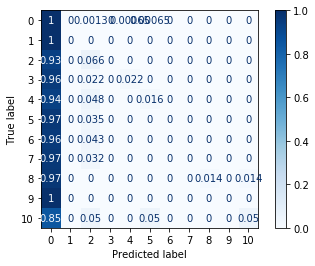

In [11]:
gb_clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=1.0, max_features=None, min_samples_leaf=0.1, min_samples_split=0.1, random_state=0)
gb_clf2.fit(X_train, y_train)

y_pred = gb_clf2.predict(X_test)

metrics.plot_confusion_matrix(gb_clf2, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1540
           1       0.00      0.00      0.00        39
           2       0.32      0.07      0.11       106
           3       0.00      0.00      0.00        89
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        86
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00        63
           8       1.00      0.01      0.03        71
           9       0.00      0.00      0.00        18
          10       0.50      0.05      0.09        20

    accuracy                           0.72      2142
   macro avg       0.23      0.10      0.10      2142
weighted avg       0.58      0.72      0.61      2142



/Users/adeshkadambi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/adeshkadambi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


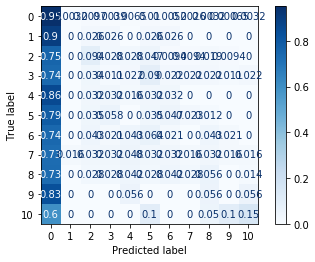

In [24]:
metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1540
           1       0.00      0.00      0.00        39
           2       0.25      0.09      0.14       106
           3       0.04      0.01      0.02        89
           4       0.04      0.02      0.02        63
           5       0.07      0.03      0.05        86
           6       0.04      0.02      0.03        47
           7       0.08      0.02      0.03        63
           8       0.20      0.06      0.09        71
           9       0.00      0.00      0.00        18
          10       0.23      0.15      0.18        20

    accuracy                           0.70      2142
   macro avg       0.16      0.12      0.13      2142
weighted avg       0.58      0.70      0.62      2142



#### Regressors

In [14]:
# Gradient Boosting

from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.25, max_depth=5, random_state=0)
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('rmse:', rmse, '| r2 score:', r2)

rmse: 2.31289048258455 | r2 score: 0.14507557863397091


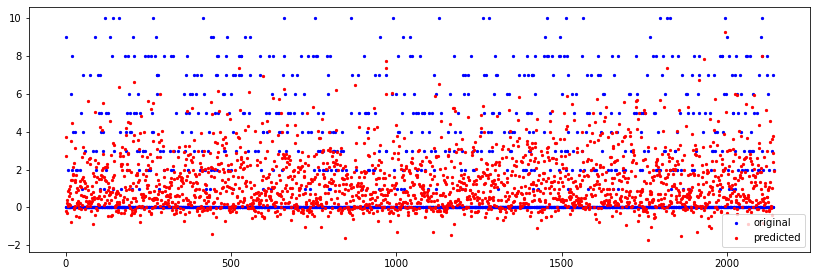

In [17]:
plt.figure(figsize=(14, 4.5))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.scatter(x_ax, y_pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()

In [18]:
# SVM

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

r2 = regr.score(X_test, y_test)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('rmse:', rmse, '| r2 score:', r2)

rmse: 2.3501538218965528 | r2 score: 0.11730602506589516


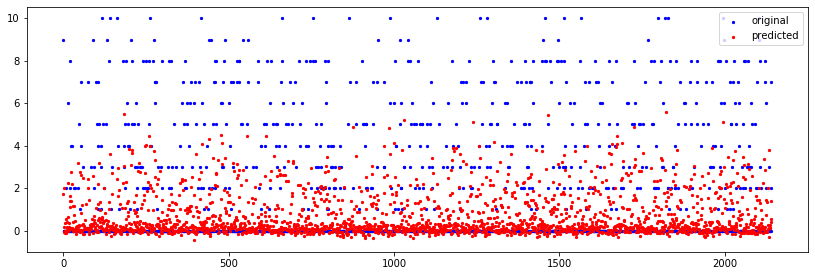

In [19]:
plt.figure(figsize=(14, 4.5))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.scatter(x_ax, y_pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()

In [20]:
# RF

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
rf.fit(X_train, y_train)

r2 = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('rmse:', rmse, '| r2 score:', r2)

rmse: 2.2211977107962895 | r2 score: 0.2115175714207146


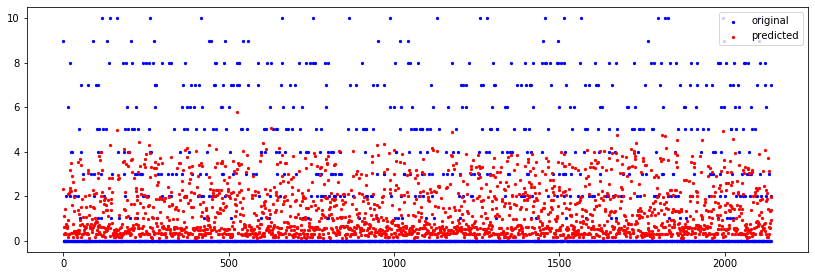

In [21]:
plt.figure(figsize=(14, 4.5))
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.scatter(x_ax, y_pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()